In [1]:
#import all the dependencies
import json
import csv
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from matplotlib import font_manager as fm
import seaborn as sns
import pycountry
import math

In [2]:
#read the file and store it in dataframe
starbucks=pd.read_csv("directory.csv")
starbucks=starbucks.dropna(axis=1, how='all')
starbucks=starbucks.drop(["Timezone","Phone Number"],axis=1)
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,54.54,24.51


In [3]:
#Create the dataframe with USA dataset
starbucks_usa=starbucks.loc[starbucks["Country"]=="US"]
starbucks_usa["Postcode"] = starbucks_usa["Postcode"].str[:5]

# starbucks_usa =  starbucks_usa.to_numeric("Postalcode"=True)
starbucks_usa =  starbucks_usa.convert_objects(convert_numeric=True)


starbucks_usa.to_csv("starbucks_usa.csv")
starbucks_usa.head(15)

C:\Users\lizet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\lizet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,Anchorage,AK,US,99504.0,-149.78,61.21
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,Anchorage,AK,US,99507.0,-149.84,61.14
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,Anchorage,AK,US,99515.0,-149.85,61.11
11967,Starbucks,24936-233524,100th & C St - Anchorage,Company Owned,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515.0,-149.89,61.13
11968,Starbucks,8973-85630,Old Seward & Diamond,Company Owned,1005 E Dimond Blvd,Anchorage,AK,US,99515.0,-149.86,61.14
11969,Starbucks,72788-84447,Fred Meyer - Anchorage #11,Licensed,1000 E Northern Lights Blvd,Anchorage,AK,US,99508.0,-149.87,61.19
11970,Starbucks,79549-106150,Safeway - Anchorage #520,Licensed,3101 PENLAND PKWY.,Anchorage,AK,US,99508.0,-149.82,61.22
11971,Starbucks,75988-107245,ANC Main Terminal Ticketing,Licensed,"HMSHost, 500 West International Airport",Anchorage,AK,US,99502.0,-149.98,61.18
11972,Starbucks,11426-99254,Tudor Rd and C Street,Company Owned,"110 W. Tudor Rd, E",Anchorage,AK,US,99503.0,-149.88,61.18
11973,Starbucks,20349-108249,Fred Meyer-Anchorage East #18,Licensed,7701 Debarr Road,Anchorage,AK,US,99504.0,-149.74,61.21


# Population vs Store count
### What is the impact of population to the number of stores?
-Does starbucks open more store based on the population density??

In [4]:
census_pd = pd.read_csv("census_data_2015.csv")
census_pd.fillna(0, inplace=True)
census_pd.head(15)

,Postcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Race White,Race African American,Race American Indian,...,Male Pacific Islander,Female Pacific Islander,Male Some Other Race,Female Some Other Race,Male Two or More Races,Female Two or More Races,Male White Not Hispanic,Female White Not Hispanic,Male Hispanic,Female Hispanic
0,601,17982,37.6,10816.0,7453.0,10861,60.399288,16956,102,14,...,0,0,444,402,21,43,13,27,8775,9167
1,602,40260,39.5,16079.0,8474.0,21720,53.949329,23144,693,8,...,0,0,880,665,6872,7926,575,786,18705,18976
2,603,52408,39.9,16804.0,10179.0,25459,48.578461,36177,2057,76,...,0,0,3024,2618,3769,4032,531,385,24688,25749
3,606,6331,40.8,12512.0,5863.0,4070,64.286843,4399,151,0,...,0,0,1015,640,32,94,0,0,3152,3171
4,610,28328,40.2,17475.0,8452.0,14005,49.438718,17791,950,0,...,0,0,2891,3315,1701,1654,172,85,13543,14456
5,612,64816,39.9,17229.0,9922.0,31139,48.042150,53756,3252,331,...,0,0,2815,1977,854,1023,140,84,30586,33956
6,616,10707,42.8,13705.0,7983.0,5733,53.544410,10088,224,31,...,0,0,35,55,72,202,0,19,5070,5615
7,617,24793,37.1,15361.0,7919.0,13670,55.136530,23276,539,0,...,0,0,281,365,161,141,0,80,11795,12850
8,622,7425,42.5,15689.0,10906.0,4344,58.505051,5251,104,0,...,0,0,940,1126,0,4,15,53,3397,3960
9,623,42955,40.9,16593.0,9257.0,21159,49.258526,32402,1515,40,...,0,0,3938,4731,136,177,32,42,20566,22315


In [5]:
zipcode_database_pd = pd.read_csv("zipcode-database.csv")
zipcode_database_pd
print(census_pd['Postcode'].dtypes)
print(zipcode_database_pd['Zipcode'].dtypes)
print(starbucks_usa['Postcode'].dtypes)

int64
int64
float64


In [6]:
# zipcode_database_pd = pd.read_csv("zipcode-database.csv")
# zipcode_database_pd
# # zipcode_database_pd['Zipcode'] = zipcode_database_pd['Zipcode'].apply(lambda x: str(x))

# print(census_pd['Postcode'].dtypes)
# print(zipcode_database_pd['Zipcode'].dtypes)

# zipcode_database_pd['Zipcode']
# zipcode_database_pd = pd.read_csv("zipcode-database.csv")
# census_pd =  census_pd.convert_objects(convert_numeric=True)
# census_with_state_pd = census_pd.merge(zipcode_database_pd, left_on="Postcode", right_on="Zipcode", how="left")
# # print(len(census_with_st?ate_pd))

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
len(census_pd)

33120

In [7]:
all_usa_census_pd = census_pd.merge(starbucks_usa, on='Postcode', how='outer')
all_usa_census_pd.to_csv('all_usa_census.csv')
all_usa_census_pd.head()


starbucks_usa_census_pd = starbucks_usa.merge(census_pd, on='Postcode', how='left')
starbucks_usa_census_pd.to_csv('starbucks_usa_census.csv')
starbucks_usa_census_pd.rename(columns={"City_x": "City"}, inplace=True)
starbucks_usa_census_pd.head()


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,...,Male Pacific Islander,Female Pacific Islander,Male Some Other Race,Female Some Other Race,Male Two or More Races,Female Two or More Races,Male White Not Hispanic,Female White Not Hispanic,Male Hispanic,Female Hispanic
0,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,Anchorage,AK,US,99504,-149.78,...,458.0,623.0,190.0,90.0,2919.0,2474.0,11306.0,10043.0,1766.0,1441.0
1,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,Anchorage,AK,US,99507,-149.84,...,235.0,248.0,489.0,501.0,1818.0,1975.0,13004.0,10913.0,1814.0,1419.0
2,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,Anchorage,AK,US,99515,-149.85,...,25.0,46.0,168.0,96.0,969.0,1323.0,7281.0,7023.0,746.0,1125.0
3,Starbucks,24936-233524,100th & C St - Anchorage,Company Owned,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,-149.89,...,25.0,46.0,168.0,96.0,969.0,1323.0,7281.0,7023.0,746.0,1125.0
4,Starbucks,8973-85630,Old Seward & Diamond,Company Owned,1005 E Dimond Blvd,Anchorage,AK,US,99515,-149.86,...,25.0,46.0,168.0,96.0,969.0,1323.0,7281.0,7023.0,746.0,1125.0


In [8]:
# Functions and defualts used below

#  function to create bin
def createbin(columnToBin, tableToUpdate, binlabels, nbrofbins, newBinColumnName, newCategoryColumnName):
    tableToUpdate[newCategoryColumnName] = pd.cut(columnToBin, len(binlabels), labels=binlabels)
    tableToUpdate[newBinColumnName] = pd.cut(columnToBin, bins=nbrofbins)

# bin length to be used for default
nbrofbins = 5

# colors for plotting
colors = ['#5cbae6','#b6d957','#fac364','#8cd3ff','#d998cb','#f2d249','#93b9c6','#ccc5a8','#52bacc','#dbdb46']

In [9]:
all_usa_census_pd

,Postcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Race White,Race African American,Race American Indian,...,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Longitude,Latitude
0,601.0,17982.0,37.6,10816.0,7453.0,10861.0,60.399288,16956.0,102.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,602.0,40260.0,39.5,16079.0,8474.0,21720.0,53.949329,23144.0,693.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603.0,52408.0,39.9,16804.0,10179.0,25459.0,48.578461,36177.0,2057.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,606.0,6331.0,40.8,12512.0,5863.0,4070.0,64.286843,4399.0,151.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,610.0,28328.0,40.2,17475.0,8452.0,14005.0,49.438718,17791.0,950.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,612.0,64816.0,39.9,17229.0,9922.0,31139.0,48.042150,53756.0,3252.0,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,616.0,10707.0,42.8,13705.0,7983.0,5733.0,53.544410,10088.0,224.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,617.0,24793.0,37.1,15361.0,7919.0,13670.0,55.136530,23276.0,539.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,622.0,7425.0,42.5,15689.0,10906.0,4344.0,58.505051,5251.0,104.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,623.0,42955.0,40.9,16593.0,9257.0,21159.0,49.258526,32402.0,1515.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# get store count and population (max) by state and postcode
state_zip_group = starbucks_usa_census_pd.groupby(['State/Province','Postcode'])
store_count = state_zip_group['Store Number'].count()

ByZip_df = pd.DataFrame(store_count)
ByZip_df['City'] = state_zip_group['City'].max()
ByZip_df['Country'] = state_zip_group['Country'].max()
ByZip_df['Population'] = round(state_zip_group['Population'].max(), 0)
ByZip_df['Median Age'] = state_zip_group['Median Age'].max()
ByZip_df['Household Income'] = state_zip_group['Household Income'].max()
ByZip_df['Per Capita Income'] = state_zip_group['Per Capita Income'].max()
ByZip_df['Latitude'] = state_zip_group['Latitude'].max()
ByZip_df['Longitude'] = state_zip_group['Longitude'].max()
ByZip_df['Poverty Count'] = state_zip_group['Poverty Count'].max()
ByZip_df['Race White'] = round(state_zip_group['Race White'].max(), 0)
ByZip_df['Race African American'] = round(state_zip_group['Race African American'].max(), 0)
ByZip_df['Race American Indian'] = round(state_zip_group['Race American Indian'].max(), 0)
ByZip_df['Race Asian'] = round(state_zip_group['Race Asian'].max(), 0)
ByZip_df['Race Pacific Islander'] = round(state_zip_group['Race Pacific Islander'].max(), 0)
ByZip_df['Race Two or More'] = round((state_zip_group['Race Two or More'].max() + 
                                     state_zip_group['Race Two or More Excluding Some Other'].max()), 0)
ByZip_df.fillna(0,inplace=True)
ByZip_df.reset_index(inplace=True)

# create bins for median age
ageGroup=[1,2,3,4,5]
createbin(ByZip_df['Median Age'],ByZip_df,ageGroup, [0,18,35,55,70],"ageBinned","ageCategory")


# create bins for Household Income
householdLabels= [1,2,3,4,5]
createbin(ByZip_df['Household Income'],ByZip_df,householdLabels, [0,60000,120000,180000,240000],"householdBinned","householdCategory")


ByZip_df.to_csv('State_Zip.csv')

# sum store count and population by state
ByState_group = ByZip_df.groupby('State/Province').aggregate({'Population':'sum', 'Store Number':'sum','Household Income':'mean',
       'Per Capita Income': 'mean', 'Poverty Count': 'sum',                                                               
       'Race White':'sum', 'Race African American':'sum',
       'Race American Indian':'sum', 'Race Asian':'sum', 'Race Pacific Islander':'sum',
       'Race Two or More':'sum'})
state_df = pd.DataFrame(ByState_group)
state_df.reset_index(inplace=True)
state_df.to_csv("state.csv")
state_df.head(15)


,State/Province,Population,Store Number,Household Income,Per Capita Income,Poverty Count,Race White,Race African American,Race American Indian,Race Asian,Race Pacific Islander,Race Two or More
0,AK,508109.0,49,70122.347826,32124.043478,44405.0,353907.0,22623.0,36950.0,34326.0,7299.0,89317.0
1,AL,1131772.0,85,48883.740000,27777.960000,175098.0,768208.0,288986.0,3412.0,30737.0,437.0,37457.0
2,AR,863371.0,55,44987.833333,27545.166667,135899.0,681154.0,113573.0,6126.0,21627.0,999.0,40168.0
3,AZ,5314874.0,488,54096.548023,28271.062147,851115.0,4265304.0,230827.0,122774.0,178408.0,10320.0,307191.0
4,CA,32812499.0,2821,68638.512903,33913.929032,4974019.0,20328769.0,1830257.0,221338.0,4726519.0,134084.0,2682963.0
5,CO,4067417.0,481,63168.087719,33801.959064,496135.0,3409932.0,172641.0,35472.0,128677.0,5792.0,260467.0
6,CT,1148597.0,123,37065.669643,19449.071429,142752.0,903412.0,95442.0,3714.0,48976.0,560.0,64419.0
7,DC,566290.0,91,71429.375000,48884.750000,90126.0,253200.0,245605.0,2005.0,23068.0,250.0,30127.0
8,DE,326414.0,25,69746.500000,38268.357143,33989.0,233718.0,58974.0,590.0,20048.0,48.0,15207.0
9,FL,10035561.0,694,53036.844193,31249.600567,1443119.0,7929730.0,1265663.0,23156.0,314912.0,5918.0,442210.0


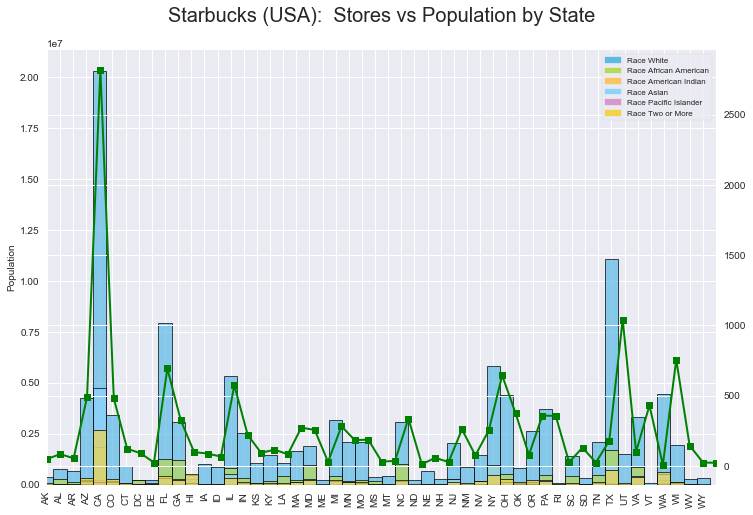

In [11]:
race = ['Race White',
       'Race African American', 'Race American Indian', 'Race Asian',
       'Race Pacific Islander', 'Race Two or More']
rects = []

x_axis = np.arange(0, len(state_df['State/Province']))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()

for c, r in zip(colors, race):
    rects.append(ax.bar(x_axis,state_df[r],width=1, color=c, align='center', alpha=0.7, edgecolor='black', label=r, linewidth=1))


line1 = state_df['Store Number'].plot(secondary_y=True, color='green', linewidth=2, marker='s', label='Starbucks Stores')


# setup title for chart
title = ax.set_title("Starbucks (USA):  Stores vs Population by State", fontsize=20)
title.set_position([.5, 1.05])


# setup tick labels for x axis
xlabels=[]
xlabels.extend(state_df['State/Province'])
ax.set_xticklabels(xlabels, rotation=90, fontsize=10)


# setup tick values for y axis
ax.set_xticks(np.arange(0, len(state_df['State/Province'])+1))
ax2.set_yticks(np.arange(0, state_df['Store Number'].max()+5))

# # setup 
ax2.set_ylabel("Starbucks Stores", fontsize=10)
ax.set_ylabel("Population", fontsize=10)

# Create legend
patches = []
handles, labels = ax.get_legend_handles_labels()
for r, c, r2 in zip(rects, colors, race):
    patches.append(mpatches.Patch(color=c, label=r2))
    

plt.legend(handles=patches, frameon=True, loc="best", fontsize=8)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores by Population.png")

In [12]:
ByZipCodeRace_StoreCount_df = ByZip_df[['State/Province','Postcode','Population','Race White','Store Number']]
ByZipCodeRace_StoreCount_df = ByZipCodeRace_StoreCount_df.rename(columns={"Store Number": "Total Stores"})
ByZipCodeRace_StoreCount_df['Race Other'] = (ByZip_df['Race African American']+
                                             ByZip_df['Race American Indian']+ByZip_df['Race Asian']+
                                             ByZip_df['Race Pacific Islander']+ByZip_df['Race Two or More'])
ByZipCodeRace_StoreCount_df.head(15)

,State/Province,Postcode,Population,Race White,Total Stores,Race Other
0,AK,99501.0,17213.0,9757.0,2,8655.0
1,AK,99502.0,23649.0,16743.0,4,8508.0
2,AK,99503.0,14107.0,7346.0,1,7656.0
3,AK,99504.0,42189.0,23243.0,5,23635.0
4,AK,99505.0,6479.0,4429.0,1,2505.0
5,AK,99506.0,7541.0,5338.0,1,2306.0
6,AK,99507.0,40013.0,25360.0,3,17082.0
7,AK,99508.0,35437.0,16678.0,2,21981.0
8,AK,99515.0,22661.0,15345.0,5,9203.0
9,AK,99517.0,16809.0,11236.0,1,6920.0


#  Population vs Store Count (Regression Analysis)

# Median Age vs Store Counts
Who is Starbucks target audience?

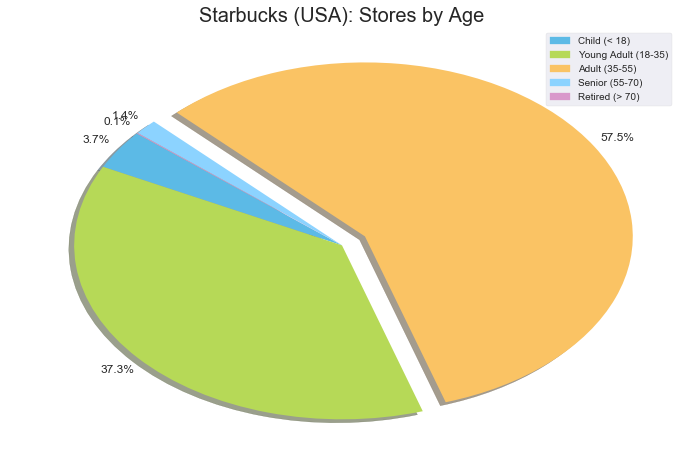

,Store Number
ageCategory,
1,497
2,5080
3,7827
4,194
5,9


In [13]:
age_group = ByZip_df.groupby("ageCategory")['Store Number'].sum()
age_group
age_df = pd.DataFrame(age_group)

# Data to plot
plt.figure(figsize=(12,8))
explode = (0.0, 0.0, 0.1, 0.0, 0.0)  # explode 1st slice

ageLabels= ['Child (< 18)','Young Adult (18-35)','Adult (35-55)','Senior (55-70)','Retired (> 70)']
plt.pie(age_df['Store Number'],  explode=explode, colors=colors, labeldistance=1.05, 
                                  autopct='%1.1f%%', pctdistance=1.1, shadow=True, startangle=140)

# handles, labels = ax.get_legend_handles_labels()
patches = []
for c, l in zip(colors, ageLabels):
    patches.append(mpatches.Patch(color=c, label=l))
    

plt.legend(handles=patches, frameon=True, loc="upper right")
    
plt.title("Starbucks (USA): Stores by Age", fontsize=20) 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores by Age.png",bbox_inches='tight')

age_df

# Household Income vs Store Counts
What is Starbucks market income target?

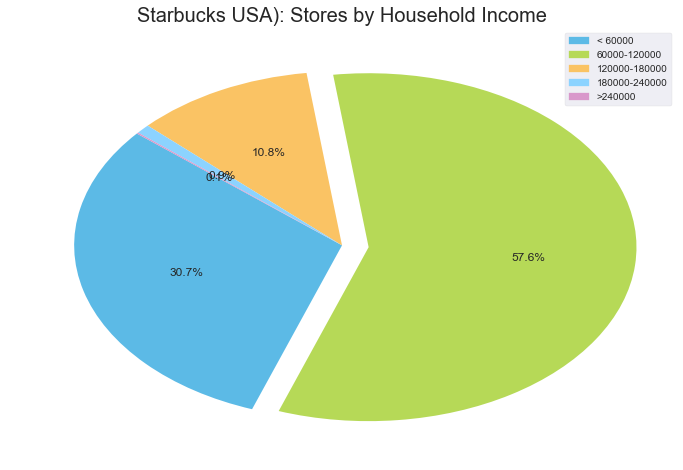

In [14]:
household_group = ByZip_df.groupby("householdCategory")['Store Number'].sum()
household_group
household_df = pd.DataFrame(household_group)

# Data to plot
plt.figure(figsize=(12,8))
explode = (0.0, 0.1, 0.0, 0.0, 0.0)  # explode 1st slice

householdLabels= ['< 60000','60000-120000','120000-180000','180000-240000','>240000']
plt.pie(household_df['Store Number'], explode=explode, colors=colors, labeldistance=1.5, 
                                  autopct='%1.1f%%', shadow=False, startangle=140)

patches = []
for c, l in zip(colors, householdLabels):
    patches.append(mpatches.Patch(color=c, label=l))

plt.legend(handles=patches, frameon=True, loc="upper right")
plt.title("Starbucks USA): Stores by Household Income", fontsize=20) 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores by Household Income.png",bbox_inches='tight')

In [15]:
household_df


,Store Number
householdCategory,
1,4172
2,7833
3,1470
4,117
5,15


In [16]:
# select only stores that Starbucks are not currently present
nonstarbucks_usa_census_pd = all_usa_census_pd[all_usa_census_pd['Brand'].isnull()]
print(len(nonstarbucks_usa_census_pd))

# Select only top 20 states where median age is between 35-55 and where household income is between 50,000 -100,000
zipcode_database_pd = pd.read_csv("zipcode-database.csv")
zipcode_database_pd = zipcode_database_pd[['Zipcode','City','State']]
nonstarbucks_selected_df = nonstarbucks_usa_census_pd[(nonstarbucks_usa_census_pd['Household Income'] >= 60000 ) & (nonstarbucks_usa_census_pd['Household Income'] <= 120000) & (nonstarbucks_usa_census_pd['Median Age'] > 18) & (nonstarbucks_usa_census_pd['Median Age'] < 45)]
nonstarbucks_selected_df = nonstarbucks_selected_df.sort_values('Household Income', ascending=[0])
nonstarbucks_selected_df = nonstarbucks_selected_df.merge(zipcode_database_pd, left_on='Postcode', right_on='Zipcode', how='inner')
# rename duplicate columns
nonstarbucks_selected_df = nonstarbucks_selected_df.rename(columns={
    "City_y": "City"
})

# remove PR - concentrate on 50 States
nonstarbucks_selected_df = nonstarbucks_selected_df[nonstarbucks_selected_df['State'] != 'PR']

state_rank_df = state_df.sort_values(['Population'], ascending=[0])
state_rank_df['pRank'] = state_rank_df['Population'].rank(ascending=False)

state_rank_df = state_rank_df[['State/Province','Store Number', 'pRank']]
state_rank_df = state_rank_df .rename(columns={
    "pRank": "State Population Rank",
    "Store Number": "Starbucks Count"
})

# merge state_rank_df to get pRank and Starbucks count to nonstarbucks selected df
nonstarbucks_selected_df = nonstarbucks_selected_df.merge(state_rank_df, left_on='State', right_on='State/Province', how='left')
# nonstarbucks_selected_df = nonstarbucks_selected_df[nonstarbucks_selected_df['State Population Rank'] <= 5 ]


# sort by Household Income and Median Age
nonstarbucks_selected_df.sort_values(['Household Income','Median Age'], ascending=[0,0])

nonstarbucks_selected_df = nonstarbucks_selected_df[['Postcode','Population','Median Age', 'Household Income','Race White','City', 'State','State Population Rank','Starbucks Count']]
nonstarbucks_selected_df.fillna(0,inplace=True)
len(nonstarbucks_selected_df)



27455


3727

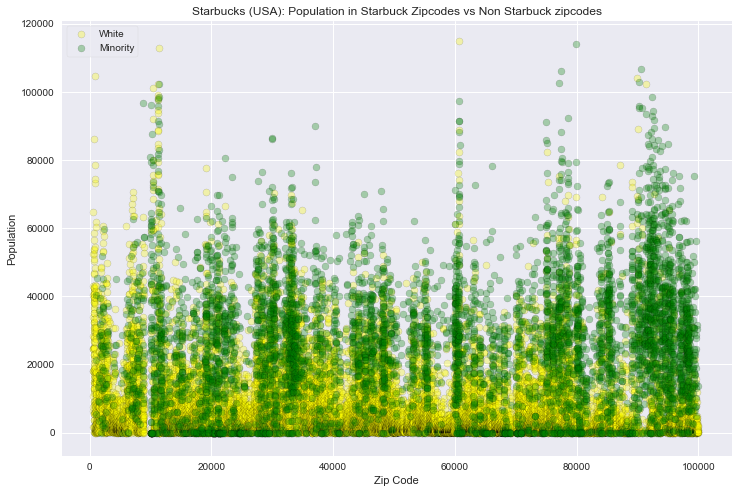

In [17]:
# Plot the Data

fig = plt.figure(figsize=(12,8))
plt.scatter(nonstarbucks_usa_census_pd['Postcode'], nonstarbucks_usa_census_pd['Population'], alpha=0.3, edgecolor='black', c="yellow", label="White")
# # plt.scatter(ByZipCodeRace_StoreCount_df['Postcode'], ByZipCodeRace_StoreCount_df['Populatcion'], alpha=0.3, edgecolor='black', c="red", label="Starbucks")
plt.scatter(ByZipCodeRace_StoreCount_df['Postcode'], ByZipCodeRace_StoreCount_df['Population'], alpha=0.3, edgecolor='black', c="green", label="Minority")
plt.legend(loc="upper left", frameon=True, fontsize=10)
plt.xlabel("Zip Code")
plt.ylabel("Population")
plt.xlim()
plt.title("Starbucks (USA): Population in Starbuck Zipcodes vs Non Starbuck zipcodes")
plt.show()


# Are there enough starbucks in the US?

In [18]:
# # merge state_rank_df to get pRank and Starbucks count to nonstarbucks selected df
# nonstarbucks_selected_df = nonstarbucks_selected_df.merge(state_rank_df, left_on='State', right_on='State/Province', how='left')
# nonstarbucks_selected_df = nonstarbucks_selected_df[nonstarbucks_selected_df['State Population Rank'] <= 5 ]


# # sort by Household Income and Median Age
# nonstarbucks_selected_df.sort_values(['Household Income','Median Age'], ascending=[0,0])

# nonstarbucks_selected_df = nonstarbucks_selected_df[['Postcode','Population','Median Age', 'Household Income','Race White','City', 'State','State Population Rank','Starbucks Count']]
# nonstarbucks_selected_df.fillna(0,inplace=True)
# len(nonstarbucks_selected_df)


In [19]:
nonstarbucks_usa_census_pd

,Postcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Race White,Race African American,Race American Indian,...,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Longitude,Latitude
0,601.0,17982.0,37.6,10816.0,7453.0,10861.0,60.399288,16956.0,102.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,602.0,40260.0,39.5,16079.0,8474.0,21720.0,53.949329,23144.0,693.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603.0,52408.0,39.9,16804.0,10179.0,25459.0,48.578461,36177.0,2057.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,606.0,6331.0,40.8,12512.0,5863.0,4070.0,64.286843,4399.0,151.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,610.0,28328.0,40.2,17475.0,8452.0,14005.0,49.438718,17791.0,950.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,612.0,64816.0,39.9,17229.0,9922.0,31139.0,48.042150,53756.0,3252.0,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,616.0,10707.0,42.8,13705.0,7983.0,5733.0,53.544410,10088.0,224.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,617.0,24793.0,37.1,15361.0,7919.0,13670.0,55.136530,23276.0,539.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,622.0,7425.0,42.5,15689.0,10906.0,4344.0,58.505051,5251.0,104.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,623.0,42955.0,40.9,16593.0,9257.0,21159.0,49.258526,32402.0,1515.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# # rank by state population
nonstarbucks_top20_df = nonstarbucks_selected_df[(nonstarbucks_selected_df['State Population Rank'] < 5 )].head(20)
# rank by state population
nonstarbucks_top20_df = nonstarbucks_top20_df.sort_values(['Household Income','State Population Rank'], ascending=[1,0])
nonstarbucks_top20_df.to_csv("nonstarbucks_usa.csv", index=False)
nonstarbucks_top20_df

,Postcode,Population,Median Age,Household Income,Race White,City,State,State Population Rank,Starbucks Count
90,94502.0,13615.0,44.9,109801.0,5628.0,ALAMEDA,CA,1.0,2821
80,11596.0,10636.0,41.4,110575.0,8324.0,WILLISTON PARK,NY,4.0,645
77,11795.0,25074.0,42.8,110815.0,23801.0,WEST ISLIP,NY,4.0,645
74,78260.0,28279.0,35.7,111076.0,23990.0,SAN ANTONIO,TX,2.0,1042
68,11766.0,12723.0,41.7,111397.0,11707.0,MOUNT SINAI,NY,4.0,645
62,75054.0,7366.0,34.7,111826.0,3511.0,GRAND PRAIRIE,TX,2.0,1042
59,12767.0,42.0,20.8,111875.0,42.0,OBERNBURG,NY,4.0,645
57,11762.0,22943.0,42.7,112083.0,22113.0,MASSAPEQUA PARK,NY,4.0,645
48,10983.0,5649.0,44.0,113036.0,4364.0,TAPPAN,NY,4.0,645
32,79911.0,3763.0,32.3,115000.0,2884.0,EL PASO,TX,2.0,1042
